In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('breast_cancer.csv')
df2 = pd.read_csv('breast_cancer.csv')
df.head(10)

,id,diagnosis,diagnosis_Num,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [2]:
df = df.drop(df.columns[[0, 1, 2]], axis=1) #Dropping id, diagnosis and diagnosis_Num
df2 = df2.drop(df2.columns[[0, 1]], axis=1) #Dropping id and diagnosis

df2.head(10)


,diagnosis_Num,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


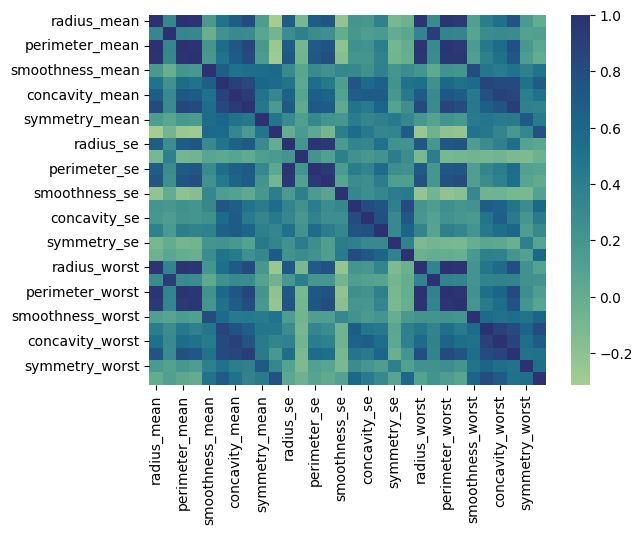

In [3]:
sns.heatmap(df.corr(), cmap='crest');

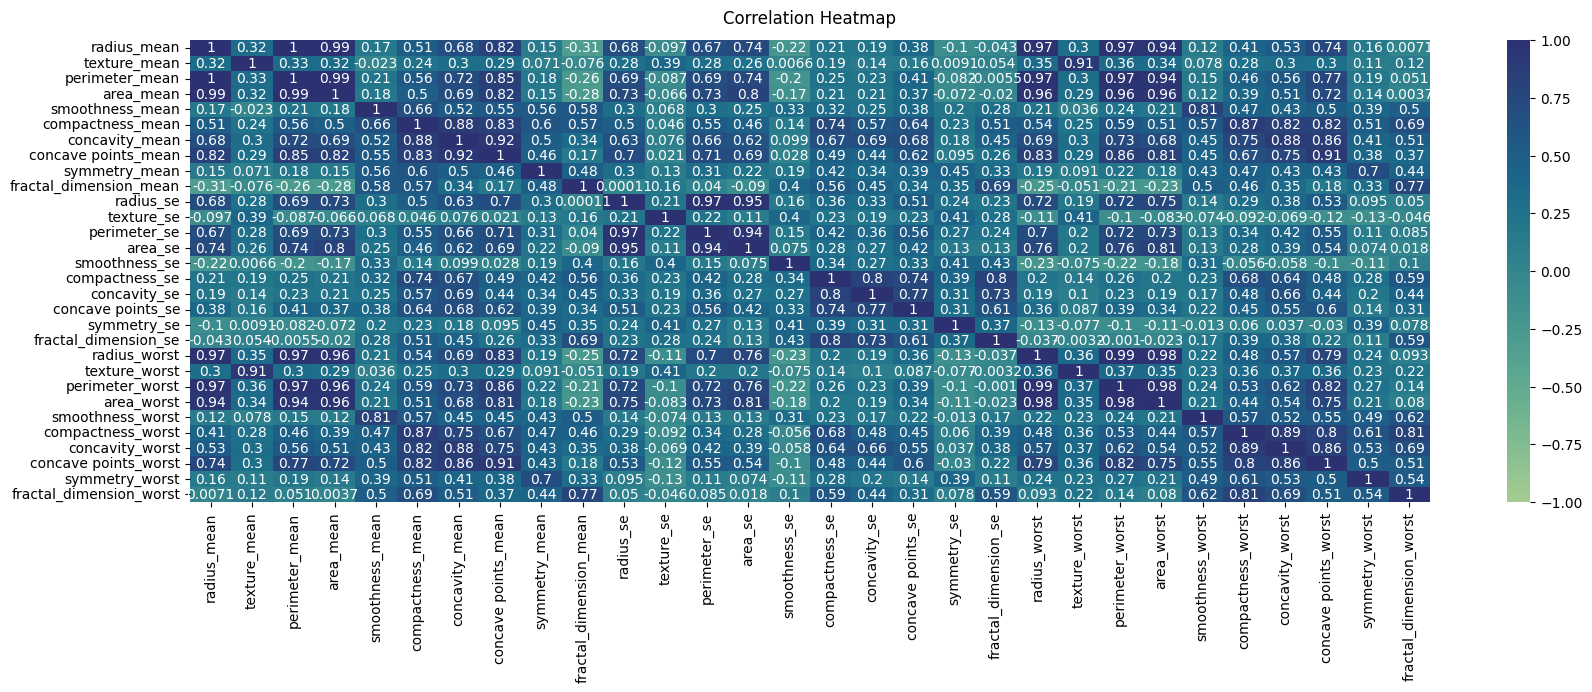

In [4]:
plt.figure(figsize=(20, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='crest');
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

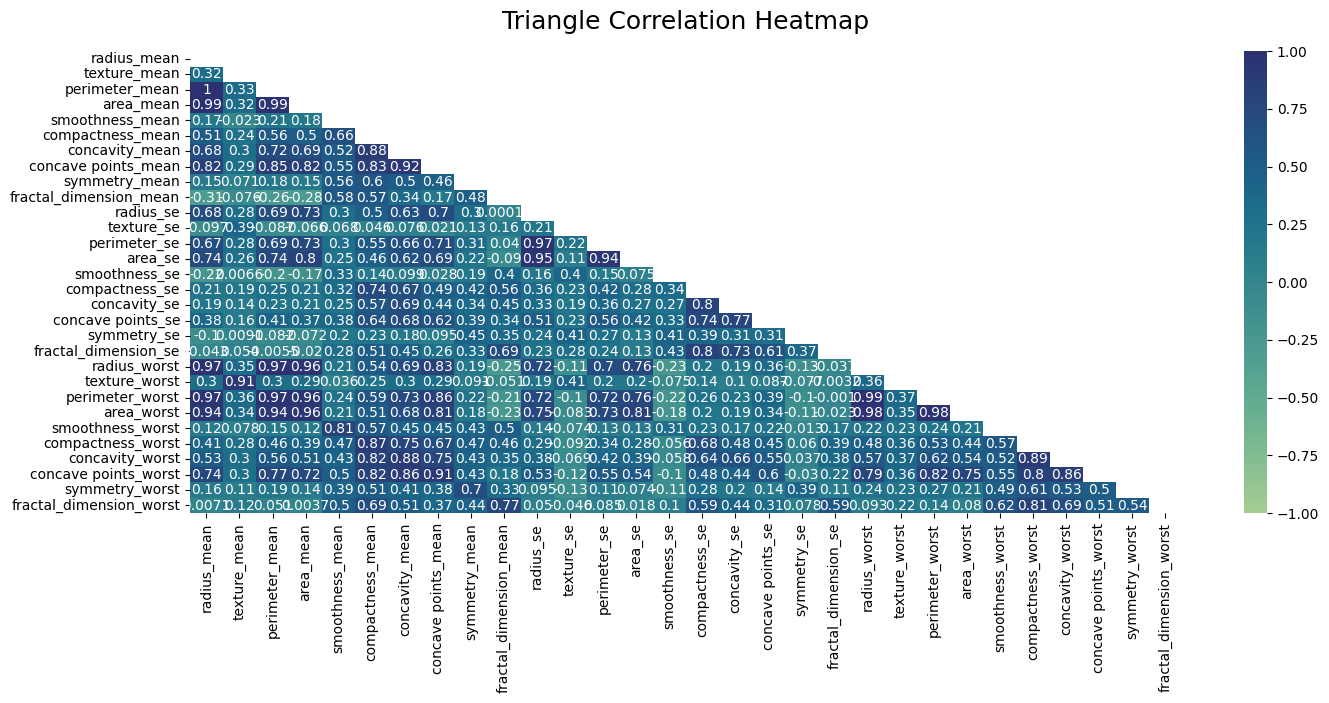

In [5]:
np.triu(np.ones_like(df.corr()))

#Make is a Triangle Correlation Heatmap
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr()))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='crest')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [6]:
df2.corr()[['diagnosis_Num']].sort_values(by='diagnosis_Num', ascending=False)

,diagnosis_Num
diagnosis_Num,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


Text(0.5, 1.0, 'Features Correlating with Diagnosis')

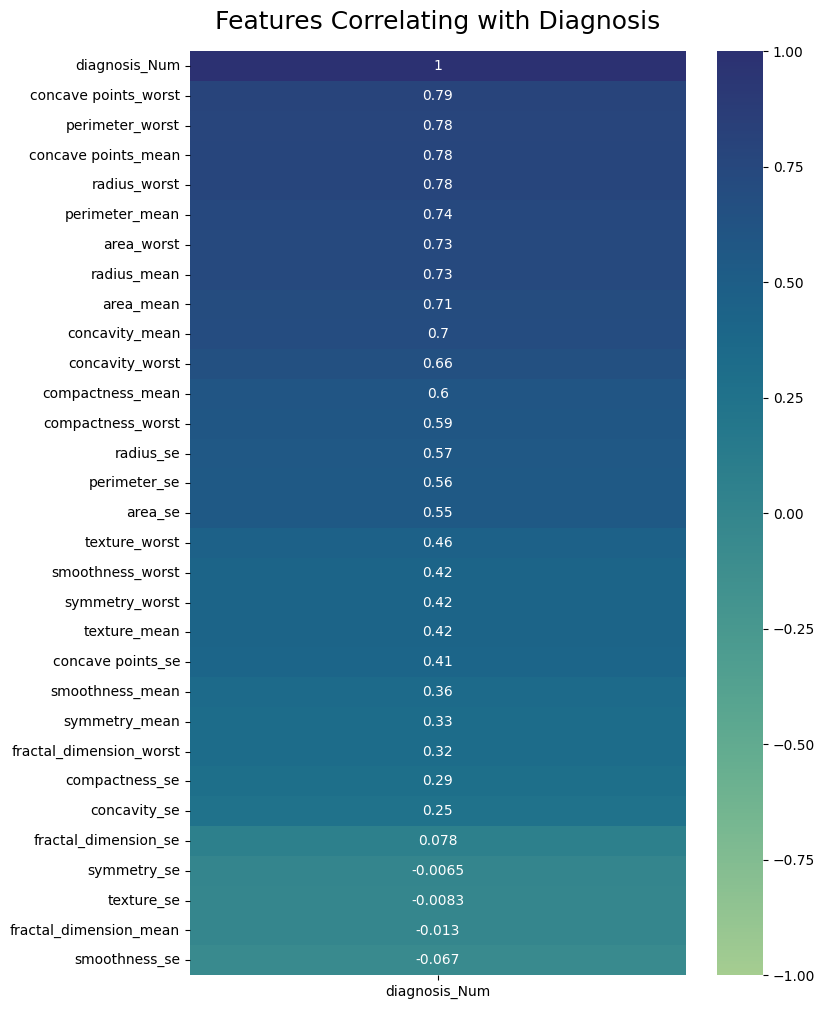

In [7]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df2.corr()[['diagnosis_Num']].sort_values(by='diagnosis_Num', ascending=False), vmin=-1, vmax=1, annot=True, cmap='crest')
heatmap.set_title('Features Correlating with Diagnosis', fontdict={'fontsize':18}, pad=16)

Text(0.5, 1.0, 'Count of Diagnosis')

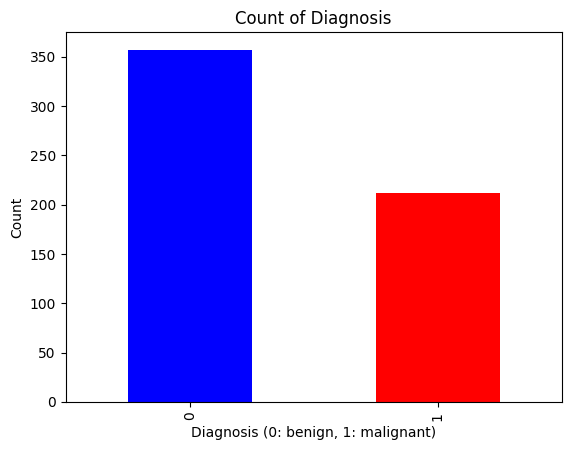

In [8]:
#Count of Diagnosis
diagnosis_counts = df2['diagnosis_Num'].value_counts()

# Plotting the counts
diagnosis_counts.plot(kind='bar', color=['blue', 'red'])

plt.xlabel('Diagnosis (0: benign, 1: malignant)')
plt.ylabel('Count')
plt.title('Count of Diagnosis')

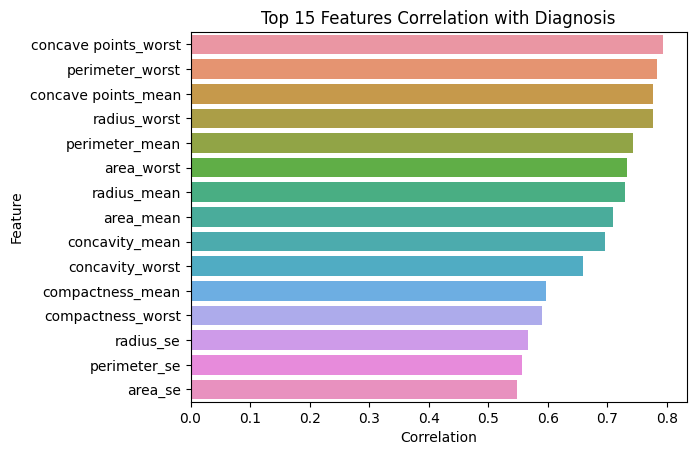

In [9]:
features = df2.drop(columns=['diagnosis_Num'])
correlation_matrix = features.corrwith(df2['diagnosis_Num'])

sorted_correlation = correlation_matrix.abs().sort_values(ascending=False) #Sorting the correlation values in descending order

top_15_features = sorted_correlation.head(15)

#Plotting the values into a bar chart.
barchart = sns.barplot(x=top_15_features.values, y=top_15_features.index)
barchart.set_title('Top 15 Features Correlation with Diagnosis')

# Add labels
plt.xlabel('Correlation')
plt.ylabel('Feature')

# Show the plot
plt.show()

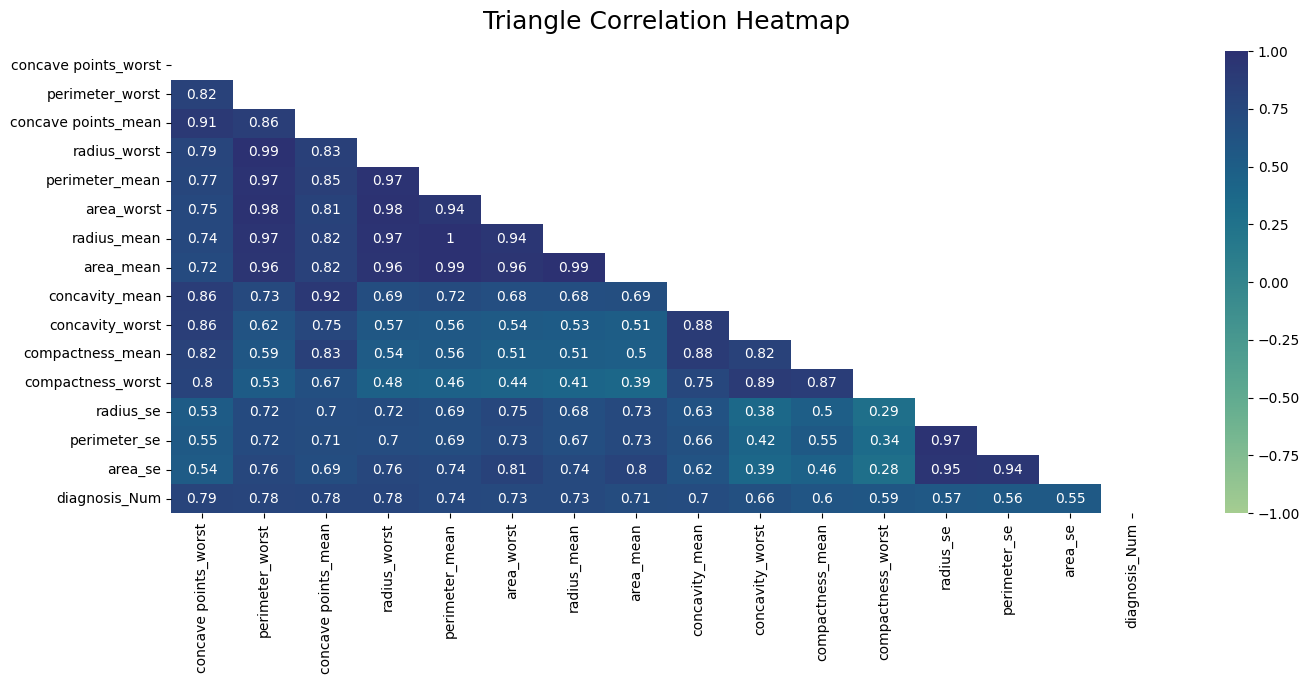

In [10]:
# Selecting the top 15 features and including diagnosis_Num
top_15_features = sorted_correlation.head(15).index.tolist()
top_15_features.append('diagnosis_Num')  # Add diagnosis_Num to the list

# Create a new DataFrame with only the top 15 features and diagnosis_Num
df_subset = df2[top_15_features]


np.triu(np.ones_like(df_subset.corr()))

#Make is a Triangle Correlation Heatmap
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_subset.corr()))
heatmap = sns.heatmap(df_subset.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='crest')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
#Scatterplot Matrix of top 15 features
hue_column = 'diagnosis_Num'

sns.pairplot(df_subset, hue=hue_column)
plt.show()